In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from OfflineTestTrader import OfflineTestTrader
from RSISLStrategy import RSISLStrategy as Strategy

In [14]:
strategy = Strategy(k1=28, k2=8, k3=5, k4=0.997, size=288)
d1 = pd.Timestamp('2019-02-24 20:00:00')
d2 = pd.Timestamp('2019-02-25 11:00:00')
trader = OfflineTestTrader("./data/2019-1-1-BTCUSDT-5m.csv", strategy, 1000, 100, before=d1, after=d2)

In [15]:
trader.run()
df = strategy.df

2019-02-25 02:15:00: buy order: 3825.66, order size: 99.99892674
2019-02-25 11:00:00: sell order: 3743.56, profit: -2.34483986, balance: 997.65516014


In [16]:
df['buyPrice'] = df['close'][df.buy]
df['sellPrice'] = df['close'][df.sell]

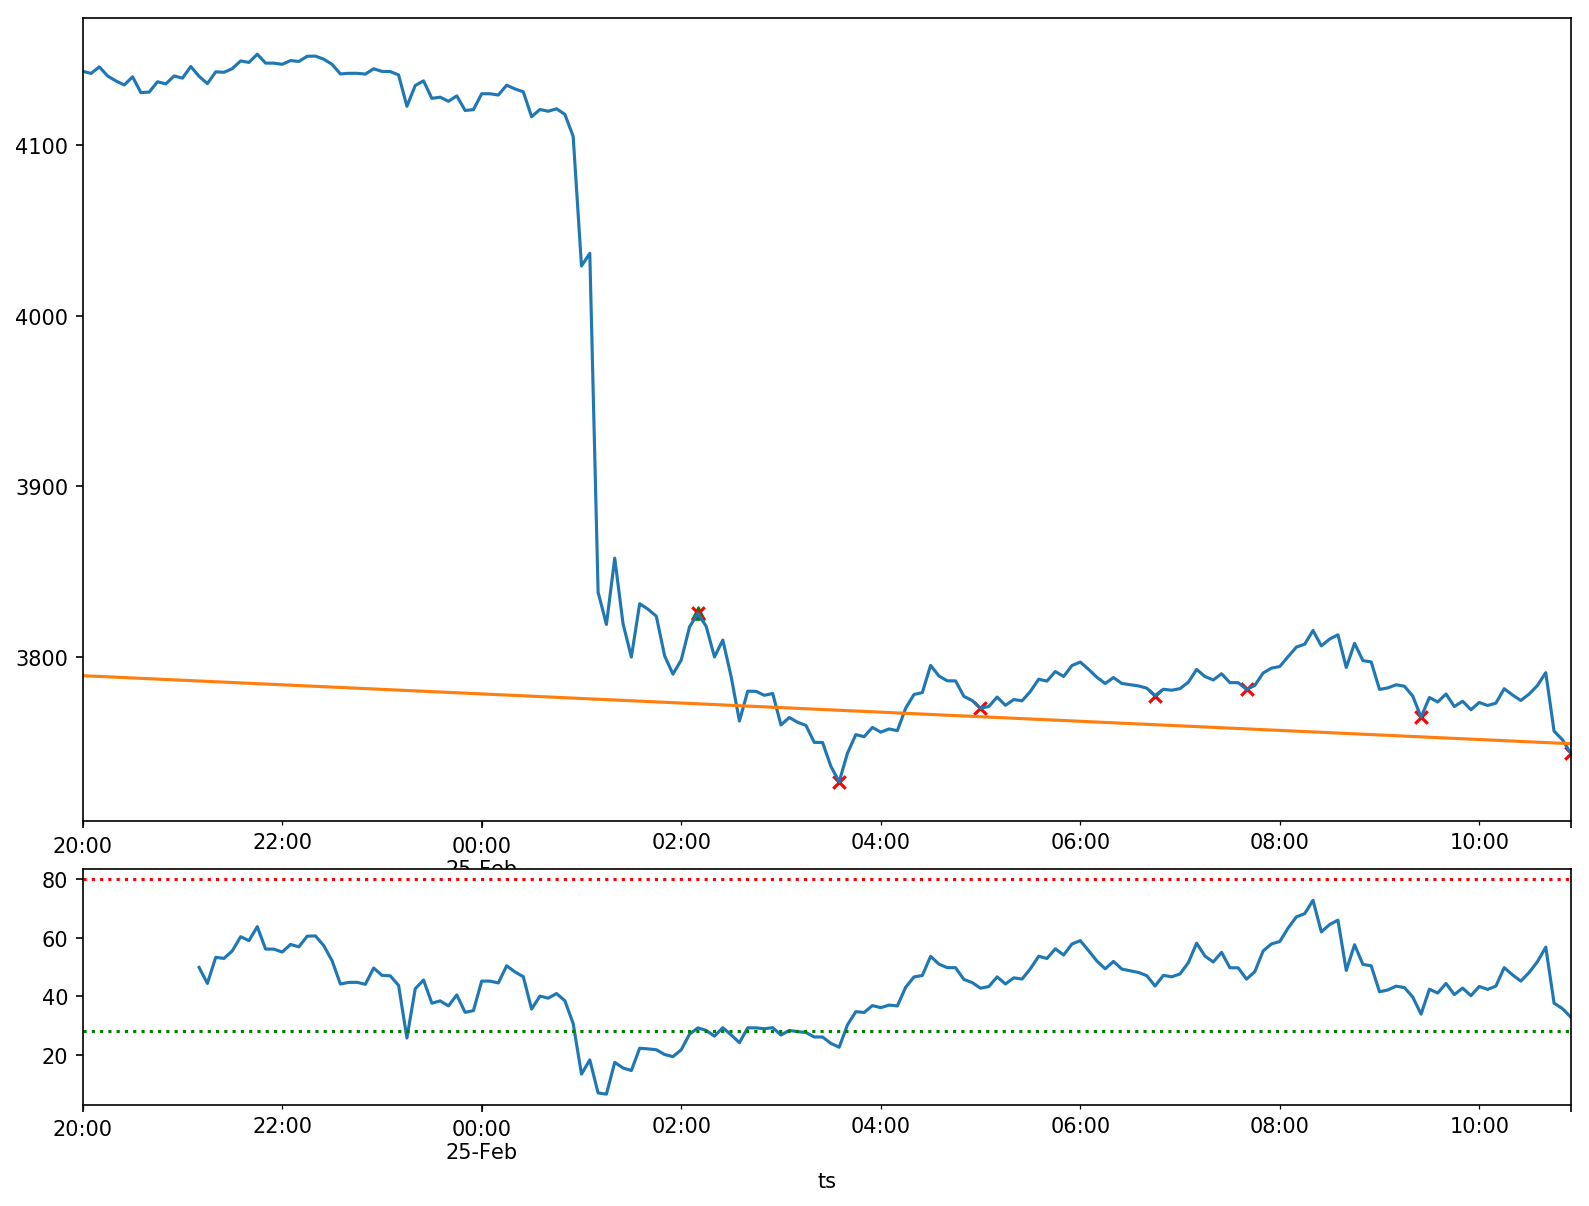

In [17]:
fig = plt.figure(figsize=(12.8, 9.6), dpi=150)

ax1 = fig.add_subplot(4,1,(1,3))
df["close"].plot()
if "pr_price" in df.columns.values: df["pr_price"].plot()
plt.scatter(df.index, df['buyPrice'], c='g', marker='^')
if strategy.mins.size > 1: plt.scatter(strategy.mins.index, strategy.mins, c='r', marker='x')
#plt.scatter(df.index, df['sellPrice'], c='r', marker='v')

ax2 = fig.add_subplot(414)
df["RSI14"].plot()
plt.axhline(y=28, color='g', linestyle=':')
plt.axhline(y=80, color='r', linestyle=':')
